**DataSet**

```
https://www.kaggle.com/uciml/pima-indians-diabetes-database
```




In [2]:
from google.colab import files
f = files.upload()

Saving diabetes.csv to diabetes.csv


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV,cross_val_score

In [6]:
df = pd.read_csv('diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1





1.   Pregnancies: Number of times pregnant
2.   Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3.   BloodPressure: Diastolic blood pressure
4.   SkinThickness:  Triceps skin fold thickness (mm)
5.   Insulin: 2-Hour serum insulin (mu U/ml)
6.   BMI: Body mass index

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


[135, 111, 103, 75, 68, 57, 50, 45, 38, 28, 24, 11, 10, 9, 2, 1, 1]

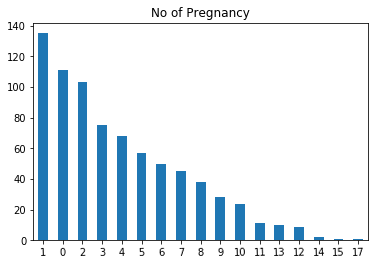

In [17]:
Pregnancies = pd.value_counts(df['Pregnancies'])
Pregnancies.plot(kind = 'bar', title='No of Pregnancy', rot=2)
list(Pregnancies)

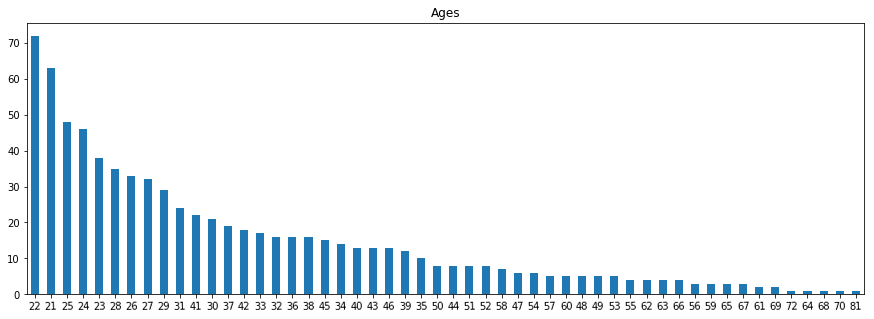

In [24]:
plt.figure(figsize=(15, 5))
age = pd.value_counts(df['Age'])
age.plot(kind = 'bar', title='Ages', rot=2)

In [28]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Feature Selection

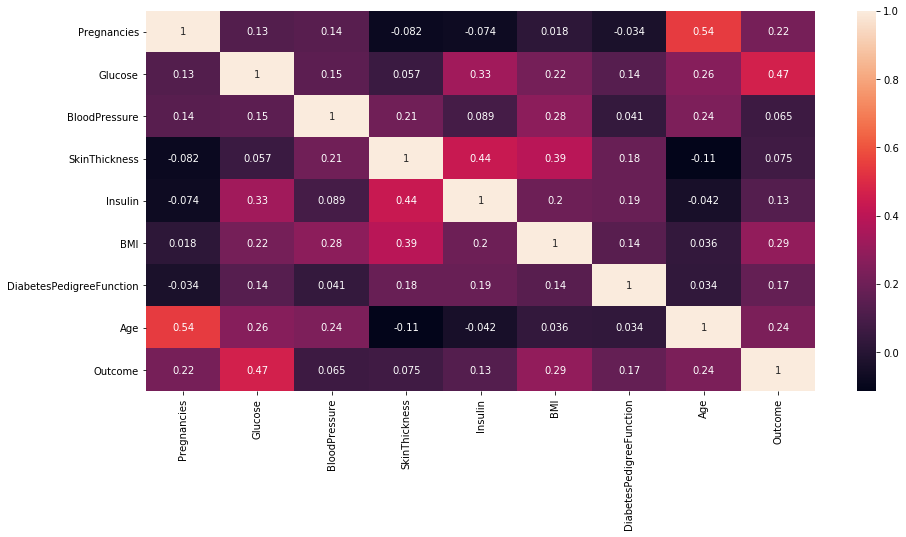

In [30]:

plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f29d1e75208>,
      dtype=object)

<Figure size 1440x504 with 0 Axes>

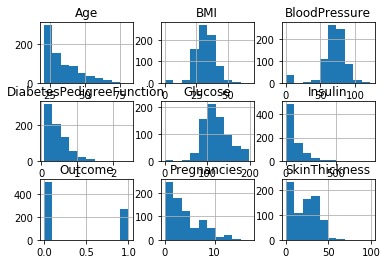

In [62]:
plt.figure(figsize=(20, 7))
df.hist()

Dependent Columns(Outcome) : has String Value - convert in to numeric

In [0]:
# Outcome = {'True':1, 'False':0}
# df['Outcome'] = df['Outcome'].map(Outcome)

In [35]:
T = len(df[df['Outcome']==1])
F = len(df[df['Outcome']==0])
T, F

(268, 500)

In [46]:
X = np.array(df.drop(['Outcome'], 1))
y = np.array(df['Outcome'])

768

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.2, random_state=10)

Find the no of zero in rows

In [53]:
print("total number of rows : {0}".format(len(df)))
print("number of rows missing Pregnancies: {0}".format(len(df.loc[df['Pregnancies'] == 0])))
print("number of rows missing Glucose: {0}".format(len(df.loc[df['Glucose'] == 0])))
print("number of rows missing BloodPressure: {0}".format(len(df.loc[df['BloodPressure'] == 0])))
print("number of rows missing SkinThickness: {0}".format(len(df.loc[df['SkinThickness'] == 0])))
print("number of rows missing Insulin: {0}".format(len(df.loc[df['Insulin'] == 0])))
print("number of rows missing BMI: {0}".format(len(df.loc[df['BMI'] == 0])))
print("number of rows missing Age: {0}".format(len(df.loc[df['Age'] == 0])))
print("number of rows missing DiabetesPedigreeFunction: {0}".format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))

total number of rows : 768
number of rows missing Pregnancies: 111
number of rows missing Glucose: 5
number of rows missing BloodPressure: 35
number of rows missing SkinThickness: 227
number of rows missing Insulin: 374
number of rows missing BMI: 11
number of rows missing Age: 0
number of rows missing DiabetesPedigreeFunction: 0


Filling the zero Value

In [70]:
from sklearn.preprocessing import Imputer

fill_values = Imputer(missing_values=0, strategy = 'mean', axis=0)
X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [73]:
clf1= KNeighborsClassifier(n_jobs=-1)
clf1.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [77]:
score = clf1.predict(X_test)

metrics.accuracy_score(y_test, score)

0.6699186991869919

In [0]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}


In [0]:
clf2 = xgboost.XGBClassifier( )

In [85]:

random_search = RandomizedSearchCV(clf2, param_distributions= params, n_jobs=-1, scoring = 'rac_aug',n_iter = 5)
random_search

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_iter=5, n_jobs=-1, nthread=None,
                                           objective='binary:logistic',
                                           random_stat...
                                           silent=None, subsample=1,
                                           verbosity=1),
                   iid='warn', n_iter=5, n_jobs=-1,
                   param_distributions={'col

In [86]:
clf2.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_iter=5,
              n_jobs=-1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              scoring='rac_aug', seed=None, silent=None, subsample=1,
              verbosity=1)

In [0]:
clf3 = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_iter=5,
              n_jobs=-1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              scoring='rac_aug', seed=None, silent=None, subsample=1,
              verbosity=1)

In [94]:
cross_val = cross_val_score(clf2, X_train, y_train, cv=10)
cross_val

array([0.75      , 0.6875    , 0.8125    , 0.6875    , 0.73333333,
       0.53333333, 0.73333333, 0.66666667, 0.53333333, 0.85714286])

In [96]:
cross_val.mean()

0.6994642857142856